In [1]:
import anndata as ad
import numpy as np
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append(os.getcwd())

from GLOBAL_VARIABLES.GLOBAL_VARIABLES import cc_mapping_package_dir
sys.path.append(cc_mapping_package_dir)

from cc_mapping import preprocess
from cc_mapping import plot
from cc_mapping import core
from cc_mapping import manifold

from cc_mapping.utils import get_str_idx

In [2]:
main_dir = "C:/Users/dap182/Documents/Stallaert_lab/PDAC_pipeline"

data_dir = f'{main_dir}/data'
fig_dir = f'{main_dir}/figures'

In [3]:
#adds the CellID to the data containing all CellID, updates adata.var_names and saves a copy of the original data 
cell_line = 'ALL'

data_file = f'{data_dir}/{cell_line}/{cell_line}.h5ad'

ALL_adata = ad.read_h5ad(data_file)


#cell_ordering_copy_name = data_file.replace('.h5ad', '_cell_ordering_copy.h5ad')
#ALL_adata.write_h5ad(cell_ordering_copy_name)

ALL_adata.obs['CellID'] = ALL_adata.obs.index
ALL_adata.var_names = ALL_adata.var['X_features']

#ALL_adata.write_h5ad(data_file)

In [ ]:
#adds the CellID to all the cell lines and saves a copy of the original data, also updates adata.var_names
cell_lines = ['CFPAC', 'BxPC3', 'UM53', 'Pa02C', 'MiaPaCa', 'Pa16C', 'Pa01C', 'HPAC']

for cell_line in cell_lines:

    data_file = f'{data_dir}/{cell_line}/{cell_line}.h5ad'

    cl_adata = ad.read_h5ad(data_file)

    #cell_ordering_copy_name = data_file.replace('.h5ad', '_cell_ordering_copy.h5ad')
    #cl_adata.write_h5ad(cell_ordering_copy_name)

    cl_idxs, _ = get_str_idx(cell_line, ALL_adata.obs['cell_line'].values)

    all_cl_adata = ALL_adata[cl_idxs,:].copy()

    assert np.all(all_cl_adata.X == cl_adata.X)

    cl_adata.obs['CellID'] = cl_idxs
    cl_adata.var_names = cl_adata.var['X_features']

    #cl_adata.write_h5ad(data_file)


In [3]:
cell_line_optimal_phate_dict = {'RF_min_max':
                                    {'all_cells':
                                        {'CFPAC':{'t': 25, 'gamma': -0.5, 'knn': 75},
                                        'BxPC3':{'t': 25, 'gamma': 0, 'knn': 75},
                                        'UM53':{'t': 50, 'gamma': -0.5, 'knn': 75},
                                        'Pa02C':{'t': 25, 'gamma': 0, 'knn': 75},
                                        'MiaPaCa':{'t': 25, 'gamma': 0, 'knn': 75},
                                        'Pa16C':{'t': 50, 'gamma': 0, 'knn': 75},
                                        'Pa01C':{'t': 50, 'gamma': 1, 'knn': 50},
                                        'HPAC':{'t': 50, 'gamma': 0.5, 'knn': 75}},
                                    'diploid': 
                                        {'CFPAC':{'t': 25 , 'gamma': -0.5 , 'knn': 50 },
                                        'BxPC3':{'t': 25 , 'gamma': -0.5 , 'knn': 50 },
                                        'UM53':{'t': 50, 'gamma': -0.5 , 'knn': 50 },
                                        'TEST': {'t':10, 'gamma': -0.5, 'knn':15},
                                        'Pa02C':{'t': 25 , 'gamma': -1 , 'knn': 50 },
                                        'MiaPaCa':{'t': 10, 'gamma': -0.5 , 'knn': 50 },
                                        'Pa16C':{'t': 50 , 'gamma': 0.5, 'knn': 50 },
                                        'Pa01C':{'t': 10, 'gamma': 0 , 'knn': 50 },
                                        'HPAC':{'t': 25 , 'gamma': 0 , 'knn': 50 },
                                        'PANC1':{'t': 10 , 'gamma': -1 , 'knn': 5 }, #this is for testing purposes
                                        'ALL':{'t':10, 'gamma': 0.5, 'knn': 15}}, #this is for the all cell lines equalized by cell number and condition 
                                    'tetraploid': 
                                        {'CFPAC':{'t': 25 , 'gamma': -0.5 , 'knn': 50 },
                                        'BxPC3':{'t': 25 , 'gamma': -0.5 , 'knn': 50 },
                                        'UM53':{'t': 50 , 'gamma': 0 , 'knn': 50 },
                                        #'Pa02C':{'t': , 'gamma': , 'knn': 50 },
                                        'MiaPaCa':{'t': 10, 'gamma': -0.5 , 'knn': 50 },
                                        'Pa16C':{'t': 25, 'gamma': 0 , 'knn': 50 },
                                        'Pa01C':{'t': 25 , 'gamma': 0.5 , 'knn': 50 },
                                        'HPAC':{'t': 25 , 'gamma': 0 , 'knn': 50 }}, 
                                    'diploid-control': 
                                        {'ALL': {'t': 25, 'gamma': 0.5, 'knn': 75}},
                                    'DC': 
                                        {'ALL': {'t': 25, 'gamma': 0.5, 'knn': 75}},
                                        },
                                'RF_min_30':
                                    {'all_cells': 
                                        {'CFPAC':{'t': 25 , 'gamma': 0.5 , 'knn': 50 },
                                        'BxPC3':{'t': 10 , 'gamma': 0 , 'knn':50  },
                                        'UM53':{'t': 10 , 'gamma': -0.5 , 'knn':50  },
                                        'Pa02C':{'t': 10 , 'gamma': -0.5 , 'knn': 50 },
                                        'MiaPaCa':{'t': 10 , 'gamma': 0 , 'knn': 50 },
                                        'Pa16C':{'t': 25, 'gamma':-0.5 , 'knn': 50 },
                                        'Pa01C':{'t': 25, 'gamma': -0.5 , 'knn': 50 },
                                        'HPAC':{'t': 25 , 'gamma': 0 , 'knn': 50 }},
                                    'diploid': 
                                        {'CFPAC':{'t': 25 , 'gamma': 0 , 'knn': 50 },
                                        'BxPC3':{'t': 10 , 'gamma': 0 , 'knn':50  },
                                        'UM53':{'t': 10 , 'gamma': -0.5 , 'knn':50  },
                                        'Pa02C':{'t': 25 , 'gamma':  0.5 , 'knn': 50 },
                                        'MiaPaCa':{'t': 10 , 'gamma': 0 , 'knn': 50 },
                                        'Pa16C':{'t': 25, 'gamma':-0.5 , 'knn': 50 },
                                        'Pa01C':{'t': 25 , 'gamma': 0 , 'knn': 50 },
                                        'HPAC':{'t': 25 , 'gamma': -0.5 , 'knn': 50 }},
                                    'tetraploid': 
                                        {'CFPAC':{'t': 25 , 'gamma': 0 , 'knn': 50 },
                                        'BxPC3':{'t': 10 , 'gamma': 0 , 'knn':50  },
                                        'UM53':{'t': 10 , 'gamma': 0 , 'knn': 50 },
                                        #'Pa02C':{'t': , 'gamma': , 'knn': 50 },
                                        'MiaPaCa':{'t': 10 , 'gamma': -0.5 , 'knn': 50 },
                                        'Pa16C':{'t': 10 , 'gamma': -0.5 , 'knn': 50 },
                                        'Pa01C':{'t': 10 , 'gamma': -1 , 'knn': 50 },
                                        'HPAC':{'t': 50 , 'gamma': 0, 'knn': 50 }}
                                        },
                                    'ALL_UNION_DC':
                                        {'ALL': {'t': 25, 'gamma': 0, 'knn': 75}},
                                    #'ALL_UNION_DIP':
                                        #{'ALL': {'t': 25, 'gamma': 0.5, 'knn': 75}},
                                        }

Calculating PHATE...
  Running PHATE on 64157 observations and 4 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 17.07 seconds.
    Calculating affinities...
    Calculated affinities in 2.36 seconds.
  Calculated graph and diffusion operator in 19.70 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 18.54 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.02 seconds.
  Calculated landmark operator in 24.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.54 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.29 seconds.
Calculated PHATE in 47.69 seconds.


<Axes: >

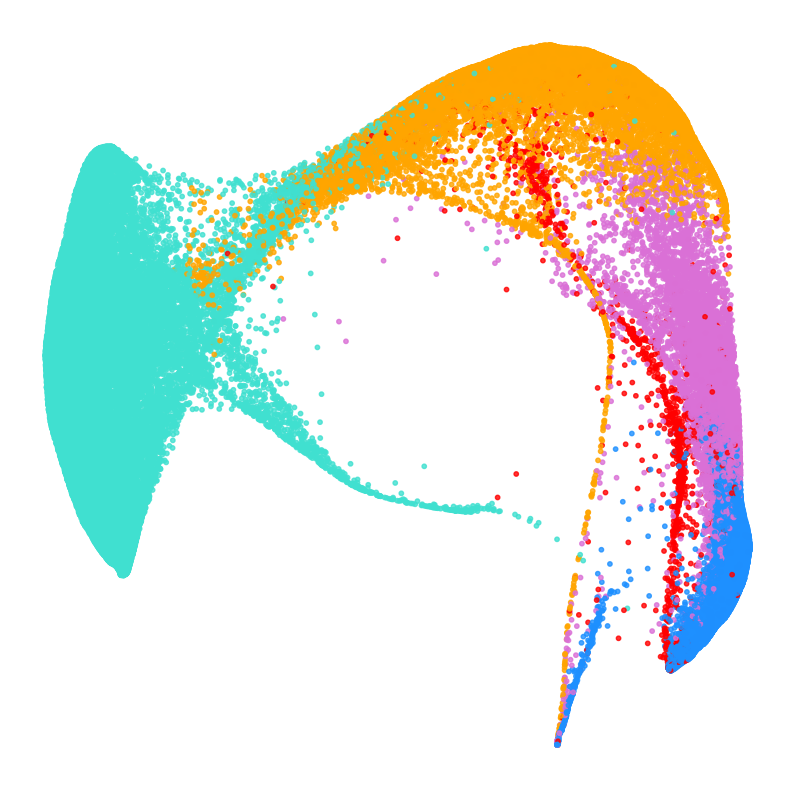

In [30]:
fs_method = 'RF_min_max'
fs_name = 'RF_min_max_feature_set'
fs_criteria = 'all_cells'
data_criteria = 'diploid'

#cell_lines = ['CFPAC', 'BxPC3', 'UM53', 'Pa02C', 'MiaPaCa', 'Pa16C', 'Pa01C', 'HPAC']

#BxPC3, Pa02C, MiaPaCa
cell_line = 'Pa16C'

data_file = f'{data_dir}/{cell_line}/{cell_line}.h5ad'

adata = ad.read_h5ad(data_file)

#creates a smaller training feature set for random forest
regex='((Std_PCNA|Intg_DNA|over_|Med_).*(nuc))|((AreaShape_Area).*(nuc|cell))'
training_features =  [feat for feat in adata.var_names if re.search(regex, feat) != None]

#runs random forest for feature selection
adata = core.random_forest_feature_selection(adata, training_features, training_labels = 'phase', method = fs_method)

#isolates diploid cells from the dataset using the adata.obs['genome'] column
adata = preprocess.row_data_partitioning(adata, search_str = data_criteria, search_obs = 'genome')

phate_optimal_parameter_dict = cell_line_optimal_phate_dict[fs_method][fs_criteria][cell_line]

adata = manifold.run_phate(adata, 
                        feature_set = 'RF_min_max_feature_set', 
                        phate_param_dict = phate_optimal_parameter_dict,
                        norm_method = 'z_score',
                        obsm_save_key = 'X_phate')

kwargs = {'s': 10,
          'alpha': 0.8,
          'rasterized': True,
        }

colors = adata.obs['phase_colors']
manifold.plot_phate_coords(adata = adata,
                        colors = colors,
                        kwargs = kwargs,)


In [23]:
fs_abbrevation = 'RMM'
updated_name = data_file.replace('.h5ad', f'_{fs_abbrevation}_FK_ALL_DK_DIP.h5ad')
adata.write_h5ad(updated_name)

In [ ]:
type(ALL_adata)

In [ ]:
type(all_cl_adata.X)